# EDA for Tabular Playground Series September 2021

Looking forward to your feedback. Please upvote if you like it. 

# Summary
* There are 118 anonymized features. 
* "claim" is the target variable.
* The training data has 957919 rows. The test data has 493474 rows. That's about half of the training set size.
* The features have missing values. The amount of missing values is in the same range for all features (train set: from 15168 to 15678 missing values). This is around 1.6% of total values.
* Roughly 1/3 of rows have no missing values. The rest has 1-15 missing values.
* The features have a very different value range. Some features have a really huge range. 
* The features have very different distributions. Some of them invite for binning. 
* There is no correlation between the features.


Train and test set are similar! (As it should be.)

In [1]:
# import packages

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib
import matplotlib.pyplot as plt
print('Matplotlib: {}'.format(matplotlib.__version__))

import seaborn as sns
print('Seaborn %s' % sns.__version__)
#-------
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Matplotlib: 3.4.3
Seaborn 0.11.2
/kaggle/input/tabular-playground-series-sep-2021/train.csv
/kaggle/input/tabular-playground-series-sep-2021/test.csv
/kaggle/input/tabular-playground-series-sep-2021/sample_solution.csv


In [2]:
# read input files
df_train = pd.read_csv("../input/tabular-playground-series-sep-2021/train.csv")
df_test = pd.read_csv("../input/tabular-playground-series-sep-2021/test.csv")
sample_submission = pd.read_csv("../input/tabular-playground-series-sep-2021/sample_solution.csv")

feature_cols = [col for col in df_train.columns if col.startswith("f")]

# Overview

In [3]:
df_train.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
0,0,0.10859,0.004314,-37.566,0.017364,0.28915,-10.25100,135.12,168900.0,3.992400e+14,...,-12.2280,1.7482,1.90960,-7.11570,4378.80,1.2096,8.613400e+14,140.1,1.01770,1
1,1,0.10090,0.299610,11822.000,0.276500,0.45970,-0.83733,1721.90,119810.0,3.874100e+15,...,-56.7580,4.1684,0.34808,4.14200,913.23,1.2464,7.575100e+15,1861.0,0.28359,0
2,2,0.17803,-0.006980,907.270,0.272140,0.45948,0.17327,2298.00,360650.0,1.224500e+13,...,-5.7688,1.2042,0.26290,8.13120,45119.00,1.1764,3.218100e+14,3838.2,0.40690,1
3,3,0.15236,0.007259,780.100,0.025179,0.51947,7.49140,112.51,259490.0,7.781400e+13,...,-34.8580,2.0694,0.79631,-16.33600,4952.40,1.1784,4.533000e+12,4889.1,0.51486,1
4,4,0.11623,0.502900,-109.150,0.297910,0.34490,-0.40932,2538.90,65332.0,1.907200e+15,...,-13.6410,1.5298,1.14640,-0.43124,3856.50,1.4830,-8.991300e+12,NaN,0.23049,1


In [4]:
df_test.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118
0,957919,0.165850,0.487050,1295.00,0.02310,0.31900,0.90188,573.29,3743.7,2.705700e+12,...,0.16253,-22.1890,2.0655,0.430880,-10.7410,81606.0,1.1940,1.980400e+14,2017.1,0.46357
1,957920,0.129650,0.373480,1763.00,0.72884,0.33247,-1.26310,875.55,554370.0,5.955700e+14,...,0.81528,-1.6342,1.5736,-1.071200,11.8320,90114.0,1.1507,4.388000e+16,6638.9,0.28125
2,957921,0.120190,0.445210,736.26,0.04615,0.29605,0.31665,2659.50,317140.0,3.977800e+14,...,0.81831,-32.7800,2.1364,-1.931200,-3.2804,37739.0,1.1548,1.718100e+14,5844.0,0.13797
3,957922,0.054008,0.395960,996.14,0.85934,0.36678,-0.17060,386.56,325680.0,-3.432200e+13,...,0.86559,-2.4162,1.5199,-0.011633,1.3840,26849.0,1.1490,2.138800e+17,6173.3,0.32910
4,957923,0.079947,-0.006919,10574.00,0.34845,0.45008,-1.84200,3027.00,428150.0,9.291500e+11,...,0.25190,-18.6300,3.7387,0.757080,-4.9405,50336.0,1.2488,2.151300e+17,2250.1,0.33796


In [5]:
# I use a subset of features here because the full table is quite messy. 
# The purpose is to demonstrate that the value range between the features varies greatly
feature_subset=["f1","f9","f29","f35","f50","f73","f96","f100","f116","f118"]

df_train[feature_subset].describe().T\
        .drop(columns=["count", "25%", "50%", "75%"])\
        .style.bar(subset=['mean','std'])\
        .background_gradient(subset=['max'])

,mean,std,min,max
f1,0.090201,0.043564,-0.149910,0.415170
f9,1806053749440377.750000,2335204188640509.000000,-1153300000000000.000000,10424000000000000.000000
f29,0.329054,0.433861,-0.005659,1.095800
f35,27823178865941924.000000,34527073956544216.000000,-20689000000000000.000000,159050000000000000.000000
f50,0.299912,0.146104,-0.006924,0.548320
f73,796463977059769.125000,1191422649409562.500000,-280280000000000.000000,6087900000000000.000000
f96,3849.687894,6437.386650,-7764.300000,38704.000000
f100,0.425840,0.283651,-0.034559,1.061300
f116,42769052891229504.000000,67324411404429680.000000,-8944400000000000.000000,324990000000000000.000000
f118,0.559267,0.408426,-0.151240,2.743600


In [6]:
# now let's look at the same features for the test set
df_test[feature_subset].describe().T\
        .drop(columns=["count", "25%", "50%", "75%"])\
        .style.bar(subset=['mean','std'])\
        .background_gradient(subset=['max'])

,mean,std,min,max
f1,0.090191,0.043538,-0.153190,0.412900
f9,1808499761924293.000000,2337721323229528.000000,-1254900000000000.000000,10489000000000000.000000
f29,0.328629,0.433810,-0.005599,1.095500
f35,27908347537158268.000000,34602159787836408.000000,-21261000000000000.000000,157030000000000000.000000
f50,0.300017,0.146154,-0.006804,0.549370
f73,798416630980295.625000,1194117239958041.750000,-263650000000000.000000,5988800000000000.000000
f96,3836.738568,6410.389934,-7890.300000,38301.000000
f100,0.426163,0.283865,-0.036089,1.060700
f116,42842576550152432.000000,67439657167513584.000000,-7749400000000000.000000,323950000000000000.000000
f118,0.558734,0.408472,-0.186960,2.732000


# Feature Analysis, Train & Test sets
## 1. Missing values

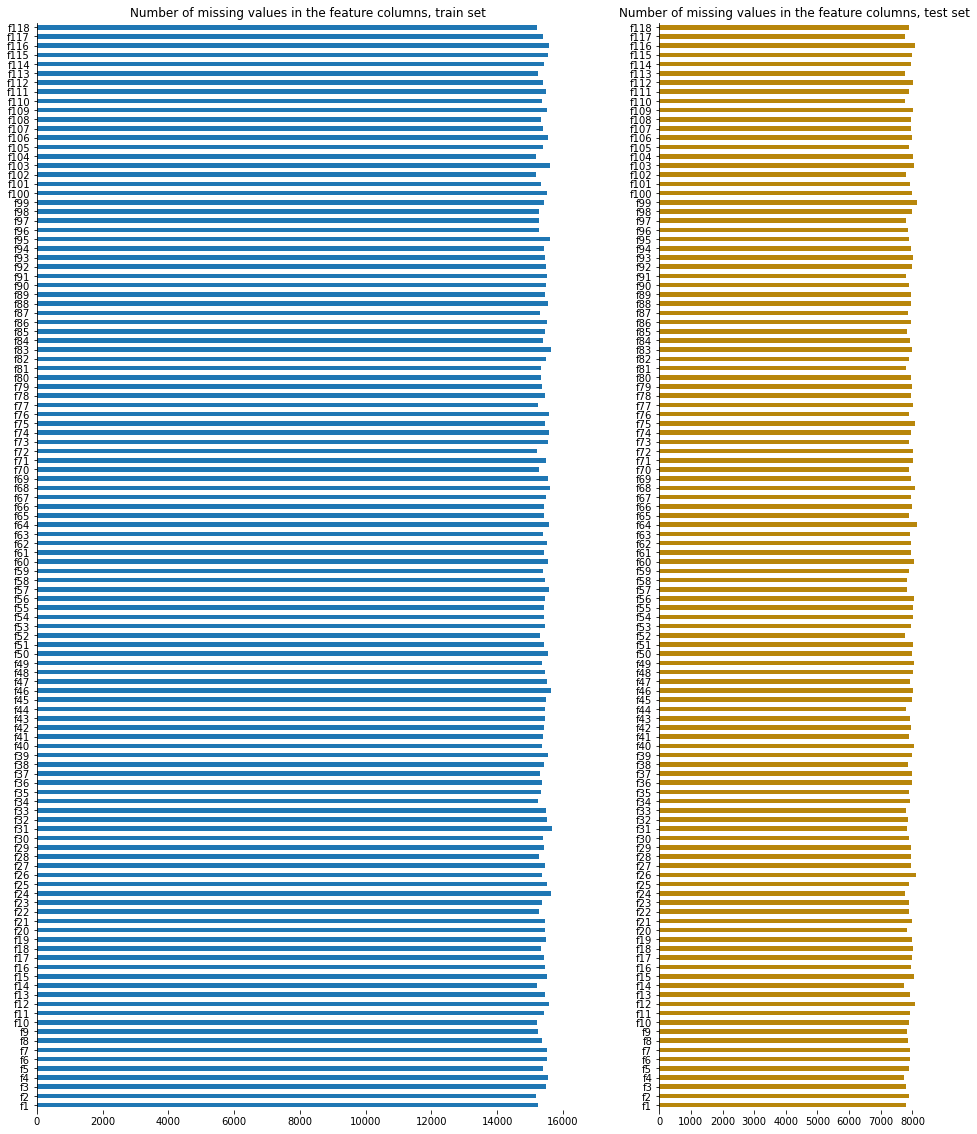

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(16,20), gridspec_kw={'width_ratios': [2, 1]})
df_train[feature_cols].isna().sum().plot(kind="barh", ax=ax[0])
df_test[feature_cols].isna().sum().plot(kind="barh", color="darkgoldenrod", ax=ax[1])
ax[0].set_title("Number of missing values in the feature columns, train set")
ax[1].set_title("Number of missing values in the feature columns, test set")

# format axes
for i in [0,1]:
    ax[i].spines['bottom'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)

plt.show()
#df_train[feature_cols].isna().sum().min()
#df_train[feature_cols].isna().sum().max()

We can see that all features have roughly the same amount of missing values. In the training set the missing values are twice of those in the test set. This is expected, because the size of the training set is twice the size of the test set.

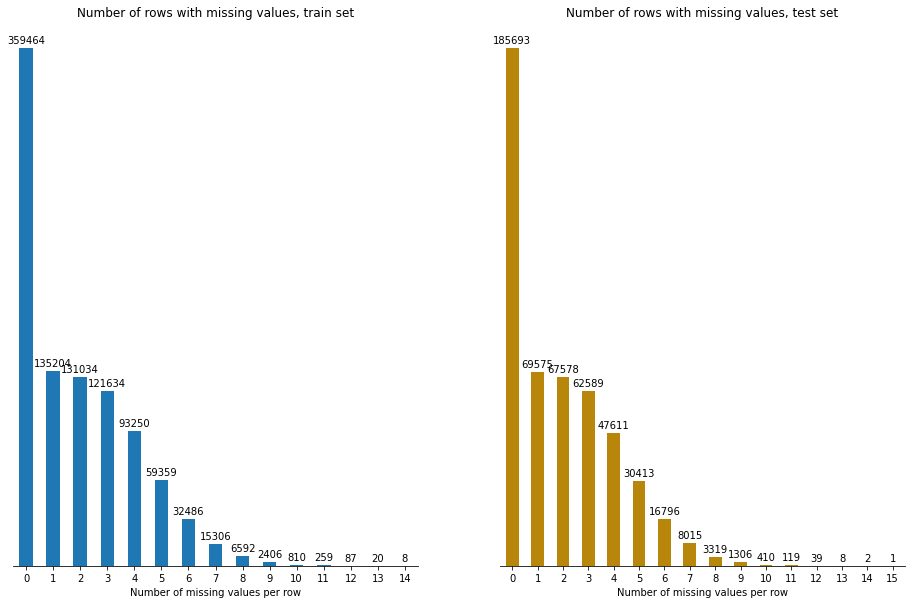

In [8]:
rows_with_missing_values = df_train[feature_cols].isna().sum(axis=1)
rows_with_missing_values_test = df_test[feature_cols].isna().sum(axis=1)

fig, ax = plt.subplots(1, 2, figsize=(16,10))

plots = rows_with_missing_values.value_counts().plot(kind="bar",  ax=ax[0])
plots_t = rows_with_missing_values_test.value_counts().plot(kind="bar",  color="darkgoldenrod", ax=ax[1])
ax[0].set_title("Number of rows with missing values, train set")
ax[1].set_title("Number of rows with missing values, test set")

for i in [0,1]:
    ax[i].spines['left'].set_visible(False) #remove the lines around the graph
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].get_yaxis().set_ticks([]) # set no ticks
    ax[i].tick_params(axis='x', rotation=0)
    ax[i].set_xlabel("Number of missing values per row")
    #ax[i].set_ylabel("Number of rows")

for bar in plots.patches:
    plots.annotate(bar.get_height(),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
for bar in plots_t.patches:
    plots_t.annotate(bar.get_height(),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
    
plt.show()
# train set: 8 rows have 14 missing values...

There are a comparable number of missing values per row in train and test set. 

The train set has 359464 rows where no values are missing. There are 8 rows where 14 values are missing.


The test set has 185693 rows with no missing values and 1 row with 15 missing values. Remeber the size of the test set is half of the train set.

## 2. Duplicates

In [9]:
df_train[feature_cols].duplicated().any()

False

In [10]:
df_test[feature_cols].duplicated().any()

False

Neither train nor test set has duplicated rows.

## 3. Distribution

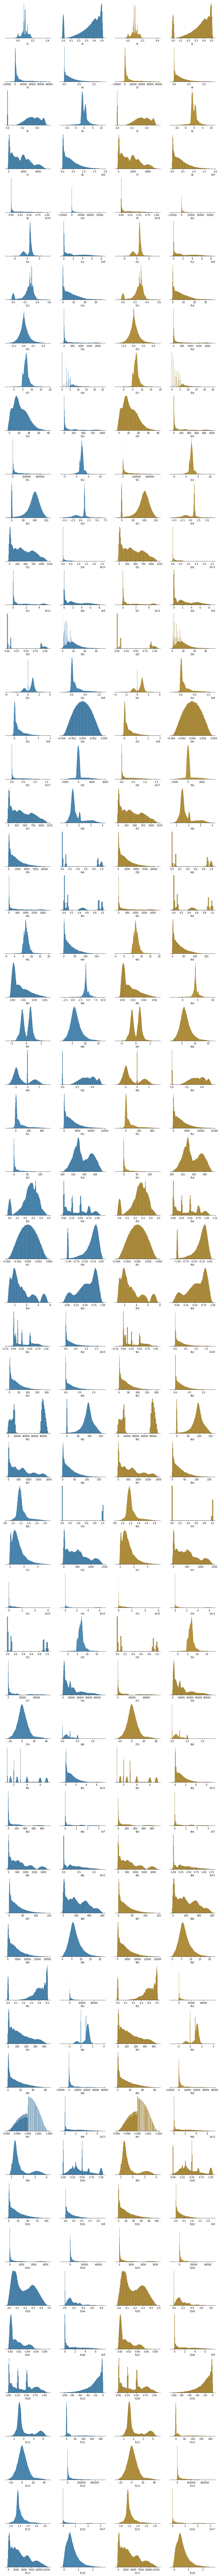

In [11]:
cols = df_train[feature_cols].columns.values
fig, ax = plt.subplots(59, 4, figsize=(16,200))
cnt = 0
for i in cols:
    p1 = sns.histplot(df_train[i], ax=ax[cnt//2, cnt%2])
    p1.set(ylabel=None) # no header on y axis
    p1.set(yticklabels=[]) # no numbers on y axis
    p1.tick_params(left=False) # remove ticks
    p1.spines['left'].set_visible(False) #remove the lines around the graph
    p1.spines['top'].set_visible(False)
    p1.spines['right'].set_visible(False)
    p2 = sns.histplot(df_test[i], ax=ax[cnt//2, 2+cnt%2], color='darkgoldenrod')
    p2.set(ylabel=None)
    p2.set(yticklabels=[])
    p2.tick_params(left=False)
    p2.spines['left'].set_visible(False) 
    p2.spines['top'].set_visible(False)
    p2.spines['right'].set_visible(False)
    cnt += 1
    
#plt.title("Feature Distributions in training set (blue) and test set (golden)")    
plt.show()

The distribution are comparable in train and test set. 

The distributions of the features vary greatly. It looks like binning or transforming of some features should be done before modeling.

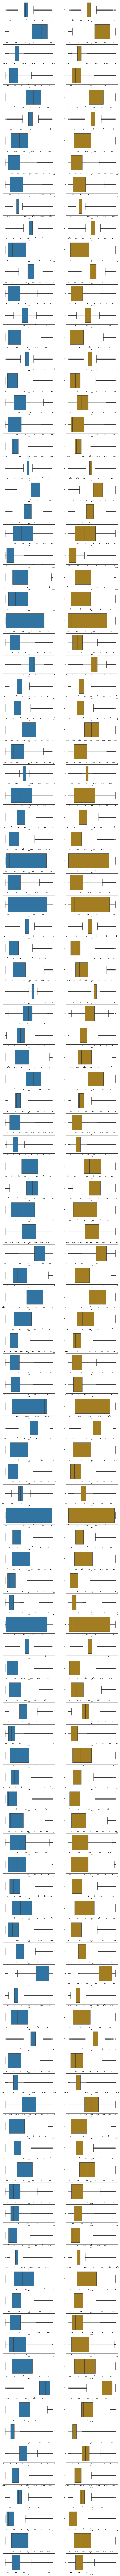

In [12]:
# make boxplots of all features, just collapse the cell if your eyes start hurting :)
cols = df_train[feature_cols].columns.values
fix, ax =  plt.subplots(len(cols),2, figsize=(18,len(cols)*3.5))
cnt=0
for i,feat in enumerate(cols):
    p1 = sns.boxplot(data=df_train[feat], orient="h", ax=ax[i,0]).set(xlabel=feat)
    p2 = sns.boxplot(data=df_test[feat], orient="h", ax=ax[i,1], color="darkgoldenrod").set(xlabel=feat)

There are nearly too many features for a visual analysis. Yet, there is still something to discover in the boxplots:

* If it wasn't for the boxplot I might have missed the tiny "hill" on the right in f74.
* f26 looks a bit different in train and test. I assume that this might come from random sampling of train and test set.

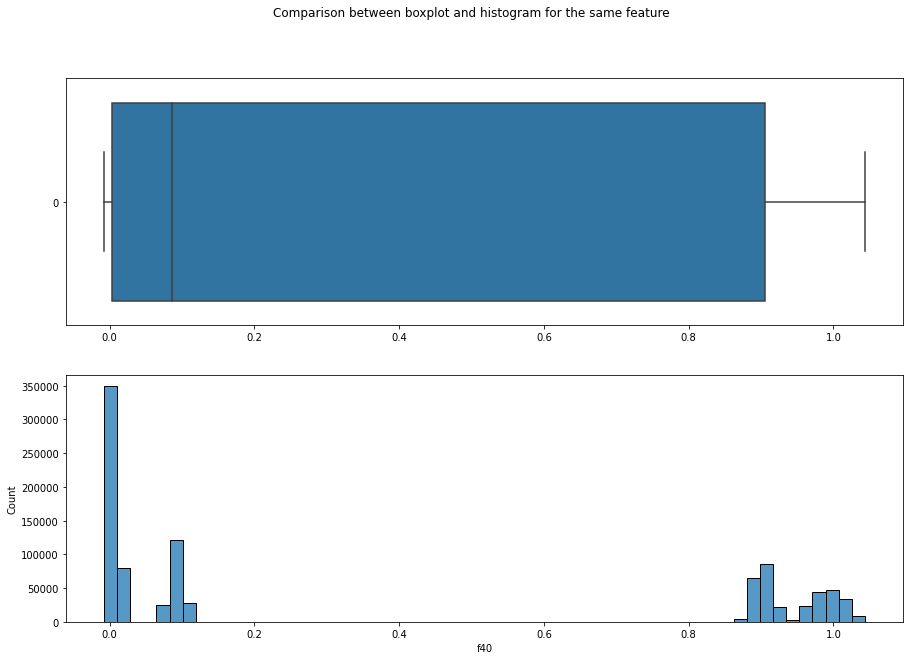

In [13]:
# compare boxplot vs histogram
# check feature f75 for an example how a boxplot can mislead you
# check feature f92 for an example where a boxplot reveals additional information
# check feature 74 and 91, for an interesting comparison
feature = "f40"

fig, ax = plt.subplots(2, 1, figsize=(15,10))
fig.suptitle("Comparison between boxplot and histogram for the same feature")
sns.boxplot(data=df_train[feature], orient="h", ax=ax[0])
sns.histplot(data=df_train[feature], ax=ax[1])
plt.show()

## 4. Correlation

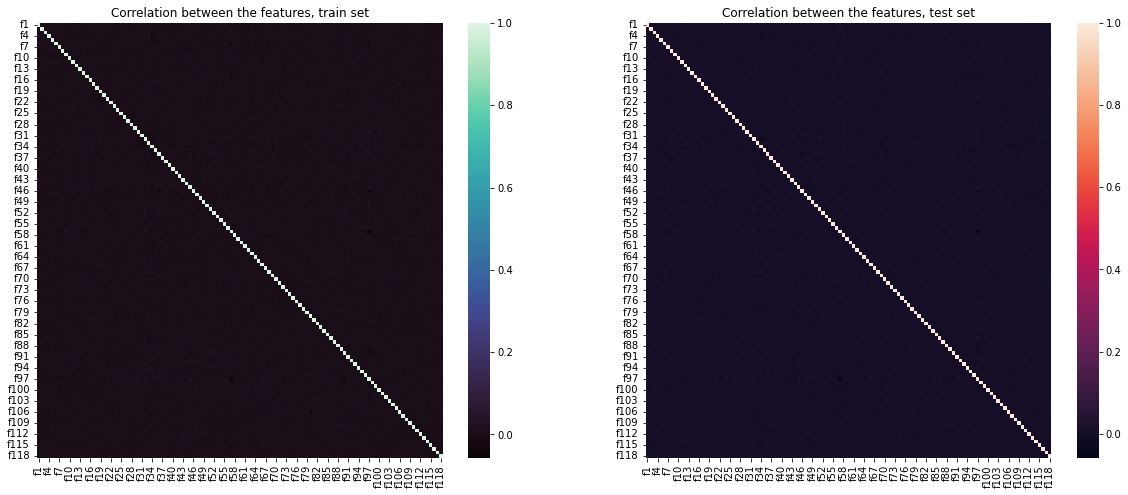

In [14]:
# check if there is a correlation between the features -> no
fig, ax = plt.subplots(1, 2, figsize=(20,8))

sns.heatmap(df_train[feature_cols].corr(), cmap='mako', ax=ax[0])
sns.heatmap(df_test[feature_cols].corr(), cmap='rocket', ax=ax[1])
ax[0].set_title("Correlation between the features, train set")
ax[1].set_title("Correlation between the features, test set")
plt.show()

There is no correlation between the features.

# Analysis of target variable

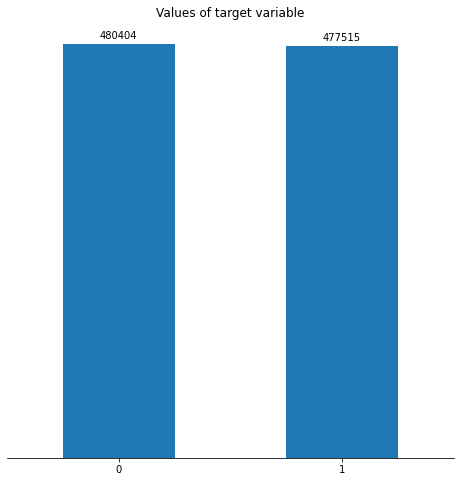

In [15]:
plt.figure(figsize=(8,8))
plots = df_train.claim.value_counts().plot(kind="bar")
plt.title("Values of target variable")
plots.spines['left'].set_visible(False) #remove the lines around the graph
plots.spines['top'].set_visible(False)
plots.spines['right'].set_visible(False)
plots.get_yaxis().set_ticks([]) # set no ticks
plt.xticks(rotation=0)
for bar in plots.patches:
    plots.annotate(bar.get_height(),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

The target variable has a roughly equal amount of 0s and 1s.